# Sunita Mane & Prakash R Lead Scoring Assignment

### Problem Statement :

X Education sells online courses to industry professionals.The company markets its courses on several websites and search engines like Google.
Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.When 
these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the 
company also gets leads through past referrals. 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, 
some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. 

#### Business Goal :

- X Education needs help in selecting the most promising leads, i.e. the leads that are most likely to convert into paying customers. 

- The company needs a model wherein you a lead score is assigned to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. 

- The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



#### The following are the steps done to find the lead conversion rate model:
- Step 1: Importing necessary libraries
- Step 2: Importing lead score data file
- Step 3: Reading data 
- Step 4: Data Cleaning
- Step 5: Outlier treatment
- Step 6: Exploratory Data Analysis
- Step 7: Data Preparation - Creating Dummies
- Step 8: Test-Train Split
- Step 9: Rescaling the features with MinMax Scaling
- Step 10: Feature Selection using RFE
- Step 11: Model Building
- Step 12: y train prediction
- Step 13: Confusion Metrics and Accuracy
- Step 14: Plotting the ROC curve
- Step 15: Finding Optimal Cutoff Point
- Step 16: Making Predictions on the Test set
- Step 17: Metrics on Test set
- Step 18: LEAD SCORE - ASSIGNMENT TO ALL CUSTOMERS
- Step 19: Conclusion

## Step 1: Importing necessary libraries


#### Step 1.1: Import warnings

In [398]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1.2: Import the data analysis libraries

In [399]:
import numpy as np
import pandas as pd

#### Step 1.3: Import the visualization libraries

In [400]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks
%matplotlib inline

#### Step 1.4: Import the model libraries

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

##### Step 1.5: Data display customization

In [402]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## Step 2: Importing lead score data file


#### Step 2.1: Importing the data file

In [403]:
Lead_data = pd.read_csv("Leads.csv", encoding = 'latin')

#### Step 2.2: Checking the sample data

In [404]:
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 3: Reading dataframe 


#### Step 3.1: To read the shape of dataframe

In [405]:
Lead_data.shape

(9240, 37)

#### Step 3.2: To know the details of dataframe

In [406]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Step 3.3: To know the descriptive information of dataframe

In [407]:
Lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Inference of DataFrame:
<span Style="color:blue">
    
- There are 9240 rows and 37 columns in dataframe.

- There are 4 variables of float type, 3 variables of int type and 30 variables of object type.

- There is huge difference between 75% and maximum values in "TotalVisits", "Total Time Spent on Website" and "Page Views Per Visit".
</span>

## Step 4: Data Cleaning


#### Step 4.1: To check for duplicates in the dataset

In [408]:
Lead_data[Lead_data.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### Inference of duplicates:
<span Style="color:blue">
    
- There are no duplicates in the dataframe.

</span>

#### Step 4.2a: To check for unique values

In [409]:
Lead_data.nunique().sort_values(ascending = False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Tags                                               26
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
Asymmetrique Activity Score                        12
How did you hear about X Education                 10
Asymmetrique Profile Score                         10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
Lead Quality                

### Inference of unique values:
<span Style="color:blue">
    
- There are 5 columns with only single unique values in the dataframe.

- These five columns will be dropped as they will not provide any extra information.

</span>

#### Step 4.2b: To drop the single unique value columns

In [410]:
# Dropping unique valued columns- columns which have only one value and would not add any value to the analysis
Lead_data= Lead_data.drop(['Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
              'Get updates on DM Content', 'Magazine', 'I agree to pay the amount through cheque'], axis=1)
Lead_data.shape

(9240, 32)

#### Step 4.2c: To replace all "Select" values in the dataframe

In [411]:
#Inspecting all the columns with Select variable in the dataframe.
colsHavingSelect = Lead_data.isin(["Select"]).any()
print(colsHavingSelect)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Newspaper Article                                False
X Educatio

In [412]:
#### Step 4.2d: replace() will replace all the occurances of the given string to missing values.
Lead_data.replace('Select', np.nan,inplace=True)

#### Step 4.3a: To check for null values in the dataframe

In [413]:
round((Lead_data.isnull().sum()/len(Lead_data))*100, 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

#### Inference of null values:
<span Style="color:blue">
    
- There are 17 columns with null values in the dataframe.

- We will consider 35% as cutoff except "Specialization". 

</span>

#### Step 4.3b: To drop columns above 35% except "Specialization"

In [414]:
Lead_data = Lead_data.drop(['Asymmetrique Profile Index', 'Lead Profile', 'Asymmetrique Activity Index','Asymmetrique Activity Score',
                      'Asymmetrique Profile Score', 'Lead Quality', 'Tags'],axis=1)
Lead_data.shape

(9240, 25)

#### Step 4.3c: To drop the remaining columns generated by sales team

In [415]:
Lead_data = Lead_data.drop(['Last Notable Activity'], axis=1)
Lead_data.shape

(9240, 24)

In [416]:
# To check the null values after replacing "Select"
round((Lead_data.isnull().sum()/len(Lead_data))*100, 2).sort_values(ascending = False)

How did you hear about X Education               78.46
City                                             39.71
Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Search                                            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Prospect ID                                       0.00
Lead Number                                       0.00
Total Time

#### Step 4.3d: To drop columns above 38% after replacing "Select"

In [417]:
Lead_data = Lead_data.drop(['How did you hear about X Education', 'City'], axis=1)
Lead_data.shape

(9240, 22)

In [418]:
# To check the data after dropping the above columns
round((Lead_data.isnull().sum()/len(Lead_data))*100, 2).sort_values(ascending = False)

Specialization                                   36.58
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Search                                            0.00
Prospect ID                                       0.00
Lead Number                                       0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Cal

### Step 4.4: To check the value counts of remaining null value columns to replace with mean, median, or mode

#### Step 4.4a: To check "Specialization" value counts

In [419]:
Lead_data['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

#### Step 4.4b: To check "What matters most to you in choosing a course" value counts

In [420]:
Lead_data['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

#### Step 4.4c: To check "What is your current occupation" value counts

In [421]:
Lead_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### step 4.4d: To check "Country" value counts

In [422]:
Lead_data.Country.value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

#### Step 4.4e: To check "TotalVisits" value counts

In [423]:
Lead_data['TotalVisits'].value_counts(normalize=True)*100

0.0      24.047017
2.0      18.455454
3.0      14.346919
4.0      12.303636
5.0       8.601560
6.0       5.119191
1.0       4.339229
7.0       3.394485
8.0       2.460727
9.0       1.801604
10.0      1.252334
11.0      0.944743
13.0      0.527299
12.0      0.494343
14.0      0.395474
16.0      0.230693
15.0      0.197737
17.0      0.175766
18.0      0.164781
20.0      0.131825
19.0      0.098869
21.0      0.065912
23.0      0.065912
24.0      0.054927
25.0      0.054927
27.0      0.054927
22.0      0.032956
29.0      0.021971
28.0      0.021971
26.0      0.021971
141.0     0.010985
55.0      0.010985
30.0      0.010985
43.0      0.010985
74.0      0.010985
41.0      0.010985
54.0      0.010985
115.0     0.010985
251.0     0.010985
32.0      0.010985
42.0      0.010985
Name: TotalVisits, dtype: float64

#### Step 4.4f: To check the value counts of "Page Views Per Visit" column

In [424]:
Lead_data['Page Views Per Visit'].value_counts(normalize=True)*100

0.00    24.047017
2.00    19.718774
3.00    13.138526
4.00     9.842909
1.00     7.151489
          ...    
3.43     0.010985
2.56     0.010985
6.33     0.010985
1.64     0.010985
2.08     0.010985
Name: Page Views Per Visit, Length: 114, dtype: float64

#### Step 4.4g: To check "Lead Source" value counts

In [425]:
Lead_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

#### Step 4.4h: To check "Through Recommendations" value counts

In [426]:
Lead_data['Through Recommendations'].value_counts(normalize=True)*100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

#### Step 4.4i: To check "Digital Advertisement" value counts

In [427]:
Lead_data['Digital Advertisement'].value_counts(normalize=True)*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

#### Step 4.4j: To check "Newspaper" value counts

In [428]:
Lead_data['Newspaper'].value_counts(normalize=True)*100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

#### Step 4.4k: To check "X Education Forums" value counts

In [429]:
Lead_data['X Education Forums'].value_counts(normalize=True)*100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

#### Step 4.4l: To check "Newspaper Article" value counts

In [430]:
Lead_data['Newspaper Article'].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

#### Step 4.4m: To check "Search" value counts

In [431]:
Lead_data['Search'].value_counts(normalize=True)*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

#### Step 4.4n: To check "Total Time Spent on Website" value counts

In [432]:
Lead_data['Total Time Spent on Website'].value_counts(normalize=True)*100

0       23.733766
60       0.205628
74       0.194805
75       0.194805
127      0.194805
          ...    
1701     0.010823
1952     0.010823
1229     0.010823
1743     0.010823
927      0.010823
Name: Total Time Spent on Website, Length: 1731, dtype: float64

#### Step 4.4o: To check "Converted" value counts

In [433]:
Lead_data['Converted'].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

#### Step 4.4p: To check "Do Not Call" value counts

In [434]:
Lead_data['Do Not Call'].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

#### Step 4.4q: To check "Do Not Email" value counts

In [435]:
Lead_data['Do Not Email'].value_counts(normalize=True)*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

#### Step 4.4r: To check "Lead Origin" value counts

In [436]:
Lead_data['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

#### Step 4.4s: To check "A free copy of Mastering The Interview" value counts

In [437]:
Lead_data['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

#### Step 4.4t: To check "Last Activity" value counts

In [438]:
Lead_data['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

#### Step 4.4s: to drop highly skewed columns

In [439]:
Lead_data.drop(['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course', 
'Search', 'Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',],axis=1,inplace=True)

#### Step 4.4t: To recheck the null values after dropping the above three columns

In [440]:
round((Lead_data.isnull().sum()/len(Lead_data))*100, 2).sort_values(ascending = False)

Specialization                            36.58
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
dtype: float64

In [441]:
Lead_data.shape


(9240, 12)

### Step 4.5: Data Cleaning - Combining columns having low percentages into one single column.

#### Step 4.5a: Combining 'Lead Origin' categories 

In [442]:
#Inspecting the column again
Lead_data['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [443]:
Lead_data['Lead Origin'] = Lead_data['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')

In [444]:
#Checking if the category has been correctly replaced. 
Lead_data['Lead Origin'].value_counts(normalize=True)*100 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Others                      0.606061
Name: Lead Origin, dtype: float64

#### Step 4.5b: Combining 'Lead Source' categories

In [445]:
#Inspecting Lead Source column.
Lead_data['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [446]:
Lead_data['Lead Source'] = Lead_data['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','google','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog','WeLearn',
                                                   'youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

In [447]:
#Checking if the category has been correctly replaced. 
Lead_data['Lead Source'].value_counts(normalize=True)*100 

Google            31.160365
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
Others             3.802694
Name: Lead Source, dtype: float64

#### Step 4.5c: Comibining "Last Activity"

In [448]:
#Inspecting 'Last Activity' column
Lead_data['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [449]:
#Combining together to form 'Others' Categories. 
Lead_data['Last Activity']=Lead_data['Last Activity'].replace(['Form Submitted on Website'      ,
'Unreachable'                    ,
'Unsubscribed'                   ,
'Had a Phone Conversation'       ,
'Approached upfront'             ,
'View in browser link Clicked'   ,
'Email Received'                 ,
'Email Marked Spam'              ,
'Visited Booth in Tradeshow'     ,
'Resubscribed to emails'],'Others') 

In [450]:
#Checking if the category has been correctly replaced. 
Lead_data['Last Activity'].value_counts(normalize=True)*100

Email Opened               37.616285
SMS Sent                   30.042684
Olark Chat Conversation    10.649010
Page Visited on Website     7.004487
Converted to Lead           4.684251
Email Bounced               3.567911
Others                      3.513188
Email Link Clicked          2.922185
Name: Last Activity, dtype: float64

#### Step 4.5d: Combining 'Specialization' categories

In [451]:
#Inspecting 'Specialization' column
Lead_data['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [452]:
Lead_data['Specialization']=Lead_data['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence','Hospitality Management','E-COMMERCE','Retail Management'],'Others')      

In [453]:
#Checking if the category has been correctly replaced. 
Lead_data['Specialization'].value_counts(normalize=True)*100 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Others                                8.464164
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Name: Specialization, dtype: float64

In [454]:
#We also handle the missing values for this Specialisation column, we add another column known as "Not Specified" for all missing values.
Lead_data.Specialization.fillna('Not Specified', inplace=True)

In [455]:
#Inspecting the column again to recheck the same.
Lead_data['Specialization'].value_counts(normalize=True)*100

Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Others                                5.367965
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Name: Specialization, dtype: float64

#### Step 4.5d: Combining "What is your current occupation" categories

In [456]:
#Inspecting value counts for Current Occupation
Lead_data['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [457]:
Lead_data['What is your current occupation']=Lead_data['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [458]:
#Inspecting the column again to recheck the same.
Lead_data['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Others                   0.519084
Name: What is your current occupation, dtype: float64

### Step 4.6: Imputing columns with low null value percentages

#### Step 4.6a: Imputing categorical columns

In [459]:
#Percentage of missing values in each column.
round((Lead_data.isnull().sum()/len(Lead_data))*100, 2).sort_values(ascending = False)

What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Specialization                             0.00
A free copy of Mastering The Interview     0.00
dtype: float64

In [460]:
#Imputing categorical columns with Mode
Lead_data['Lead Source'].value_counts(normalize=True)*100

Google            31.160365
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
Others             3.802694
Name: Lead Source, dtype: float64

In [461]:
#Imputing missing values in 'Lead Source' with mode. 
Lead_data['Lead Source'].fillna('Google',inplace=True)

In [462]:
#Imputing categorical columns with Mode
Lead_data['Last Activity'].value_counts(normalize=True)*100

Email Opened               37.616285
SMS Sent                   30.042684
Olark Chat Conversation    10.649010
Page Visited on Website     7.004487
Converted to Lead           4.684251
Email Bounced               3.567911
Others                      3.513188
Email Link Clicked          2.922185
Name: Last Activity, dtype: float64

In [463]:
#Imputing missing values in 'Last Activity' with mode. 
Lead_data['Last Activity'].fillna('Email Opened',inplace=True)

In [464]:
#Imputing categorical columns with Mode
Lead_data['What is your current occupation'].value_counts(normalize=True)*100 

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Others                   0.519084
Name: What is your current occupation, dtype: float64

In [465]:
#Replacing categorical columns with Unemployed in Current Occupation 
Lead_data['What is your current occupation'].fillna('Unemployed', inplace = True)

In [466]:
#Imputing categorical columns with Mode
Lead_data['What is your current occupation'].value_counts(normalize=True)*100 

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Others                   0.367965
Name: What is your current occupation, dtype: float64

In [467]:
#Since TotalVisits is a numerical column, we first inspect the data.
Lead_data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [468]:
#Imputing missing values in 'TotalVisits' with mean/median which is 3. 
Lead_data['TotalVisits'].fillna(Lead_data['TotalVisits'].median(),inplace=True)

In [469]:
#Checking for distribution
Lead_data['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [470]:
#Page Per Views is also a numerical column, hence we check the distribution first.
Lead_data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [471]:
#Imputing missing values with mean/median which is 2. 
Lead_data['Page Views Per Visit'].fillna(Lead_data['Page Views Per Visit'].median(),inplace=True)

In [472]:
#Page Per Views is also a numerical column, hence we check the distribution first.
Lead_data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [473]:
#Percentage of missing values in each column.
round((Lead_data.isnull().sum()/len(Lead_data))*100, 2).sort_values(ascending = False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [474]:
#Row-wise null count
print(Lead_data.isnull().sum(axis=1))

0       0
1       0
2       0
3       0
4       0
       ..
9235    0
9236    0
9237    0
9238    0
9239    0
Length: 9240, dtype: int64


In [475]:
Lead_data.shape

(9240, 12)

### Inference of Data Cleaning:
<span Style="color:blue">
    
- The 5 columns with only one variable in the columns were dropped.
    
- The six columns with null values above 30% were dropped.

- Two columns with data skewness and three columns with null values above 30% were dropped.
   
- Specialization null values were replaced with new variable "unknown", Page Views per visit null values were replaced with google and numeric variables null values were replaced by median
    
- We are left with 12 columns after dropping the less relevant columns

</span>

## Step 5: Outlier treatment


#### Step 5.1: To check the outliers at 25%,50%,75%,90%,95% and above before outlier treatment

In [476]:
Lead_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


#### Step 5.2: To Check the outliers in boxplot

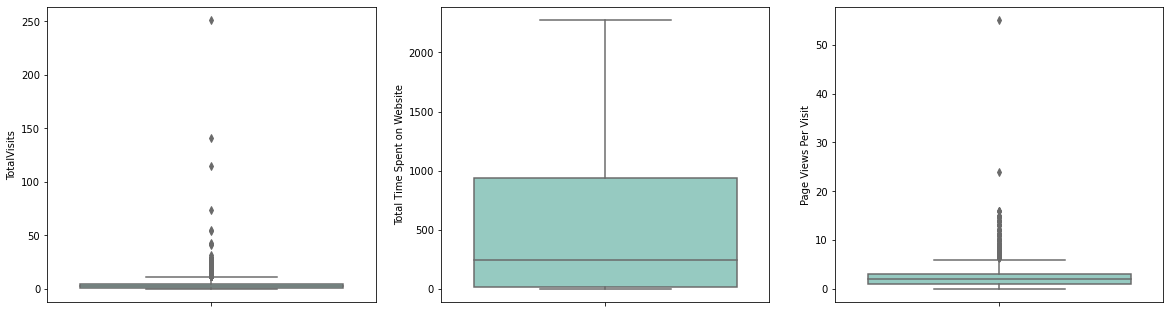

In [477]:
plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', palette='Set3', data = Lead_data)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', palette='Set3', data = Lead_data)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', palette='Set3', data = Lead_data)
plt.show()

### Inference of Data Cleaning:
<span Style="color:blue">
    
- From the above, it can be seen that outlier exists in the columns "Total Visits" and "Page Views Per Visit columns".

</span>

#### Step 5.3: Removing values beyond 99% for "Total visits" and "Page Views Per Visit"

In [478]:
# Removing values beyond 99% for Total Visits

quartile_total_visits = Lead_data['TotalVisits'].quantile(0.99)
Lead_data = Lead_data[Lead_data["TotalVisits"] < quartile_total_visits]
Lead_data["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [479]:
# Removing values beyond 99% for Page Views Per Visit

quartile_page_visits = Lead_data['Page Views Per Visit'].quantile(0.99)
Lead_data = Lead_data[Lead_data['Page Views Per Visit'] < quartile_page_visits]
Lead_data['Page Views Per Visit'].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

#### Step 5.4 Checking outliers at 25%,50%,75%,90%,95% and above after outlier treatment

In [480]:
Lead_data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000,9029.000000,9029.000000
mean,617223.248422,0.385092,3.087164,483.133016,2.226383
std,23372.383121,0.486644,2.801244,547.420675,1.823395
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596530.000000,0.000000,1.000000,7.000000,1.000000
50%,615645.000000,0.000000,3.000000,245.000000,2.000000
75%,637360.000000,1.000000,4.000000,929.000000,3.000000
90%,650463.200000,1.000000,7.000000,1378.000000,5.000000
95%,655351.600000,1.000000,8.000000,1558.000000,6.000000
99%,659577.800000,1.000000,13.000000,1839.720000,7.000000


### Inference of Outlier Treatment:
<span Style="color:blue">
    
- After outlier treatment for the columns "TotalVisits" and "Page Views Per Visit" there is significant reduction in the maximum values and 99%.

</span>

In [481]:
# Determine the percentage of data retained

num_data = round(100*(len(Lead_data)/9240),2)
print(num_data)

97.72


## Step 6: Exploratory Data Analysis


### Step 6.1: Univariate Analysis

#### Step 6.1a: Catplot for "Converted" column

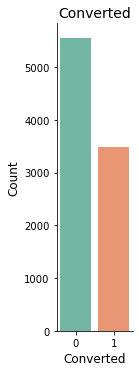

In [482]:
plot = sns.catplot(x="Converted", kind="count", data=Lead_data, palette="Set2", aspect= 0.4);

plt.title('Converted', fontsize = 14)
plt.xlabel("Converted", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### Inference of "Converted" catplot:
<span Style="color:blue">
    
- From the above graph we can see that there is conversion rate of around 39%.

</span>

#### Step 6.1b: Univariate analysis for numerical variables

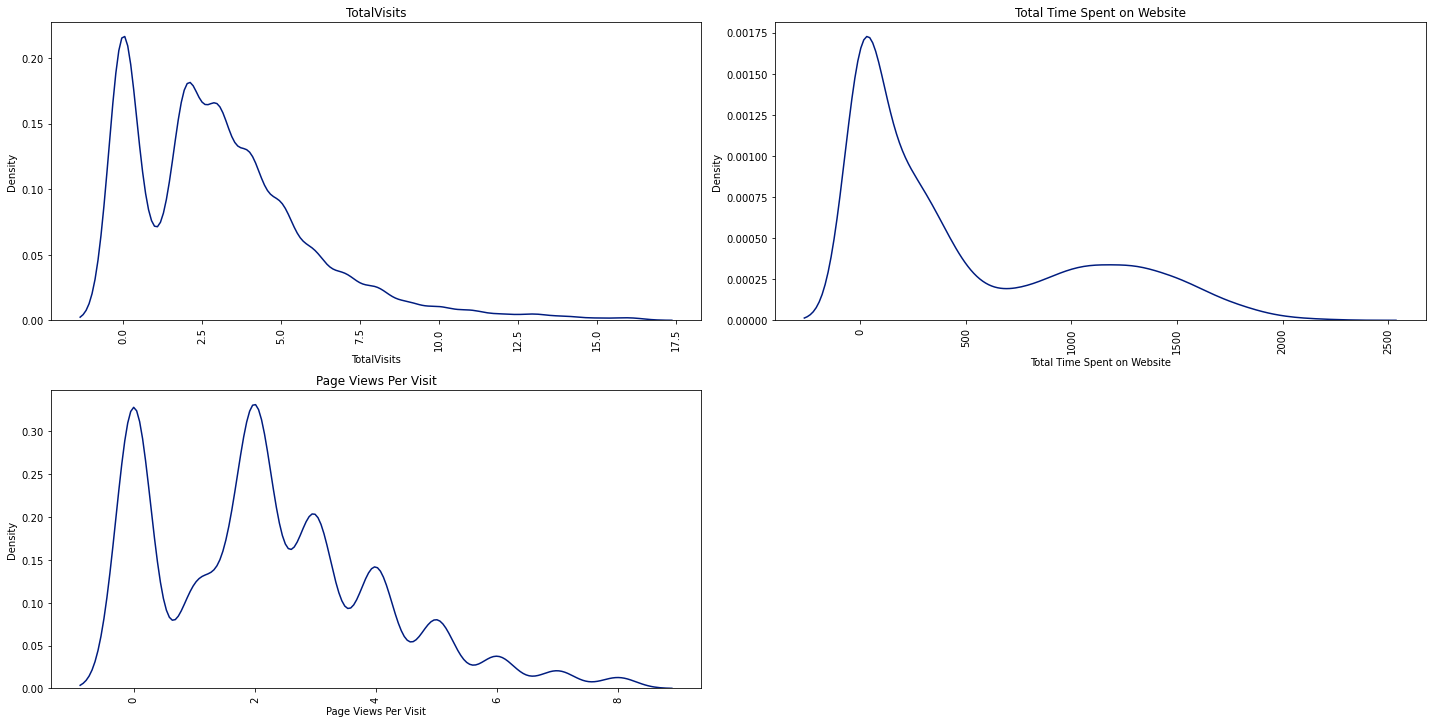

In [483]:
num_cols= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
sns.set_palette("dark")
plt.figure(figsize = (20, 20))

for col in enumerate(num_cols):
    plt.subplot(4, 2, col[0]+1)
    plt.title(col[1])
    sns.distplot(Lead_data[col[1]], hist =False)
    plt.tight_layout()
    plt.xticks(rotation = 90)

### Inference of "Converted" catplot:
<span Style="color:blue">
    
- The max probability for TotalVisits is found to be around 15-20. It increases initially but decreases further.
- The max probability for PageViewsPerVisit is found to be around to be 3-5
- The probability of time spent is found to be high for time between 0-300 seconds and decreases further.

</span>

### Step 6.2: Bivariate Analysis

#### Step 6.2a: To plot catplot for "Lead Source Vs Converted"

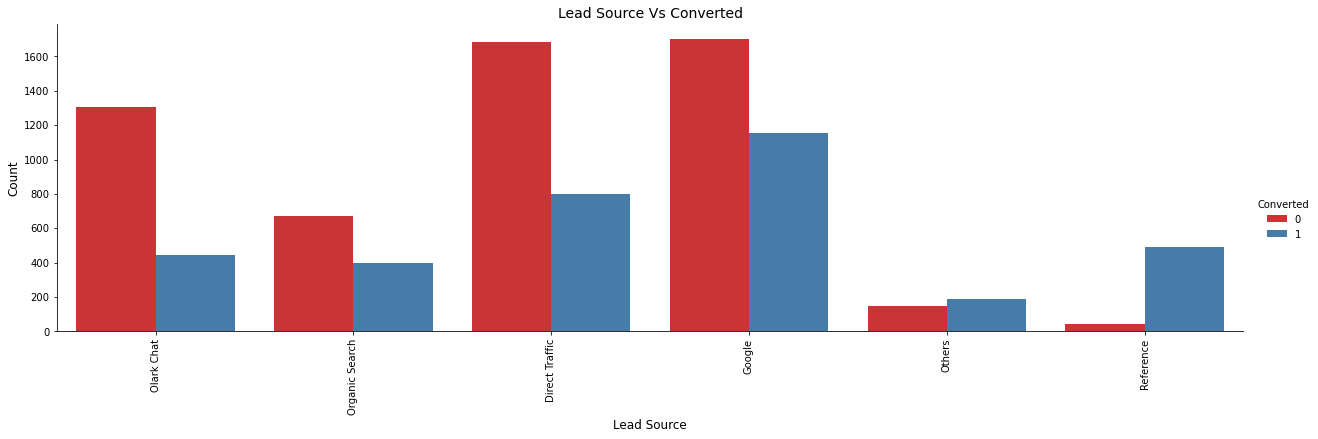

In [484]:
plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=Lead_data, palette="Set1", aspect = 3.5);

plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.xticks(rotation=90)
plt.show()

### Inference of "Lead Origin Vs Converted" catplot:
<span Style="color:blue">
    
- Majority of conversion in Lead Origin are from google followed by Direct Traffic.

</span>


#### Step 6.2b: To catplot "A free copy of Mastering the Interview Vs Converted"

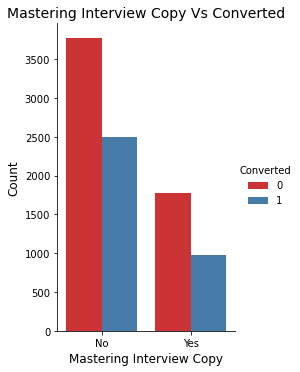

In [485]:
plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=Lead_data, palette="Set1",
                   aspect = 0.7);

plt.title('Mastering Interview Copy Vs Converted', fontsize = 14)
plt.xlabel("Mastering Interview Copy", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

### Inference of "A free copy of Mastering Interview Vs Converted" catplot:
<span Style="color:blue">
    
- Conversions have taken place more in those who have not opted for a free mastering interview copy.

</span>

#### Step 6.2c: To plot barplot for numerical variables

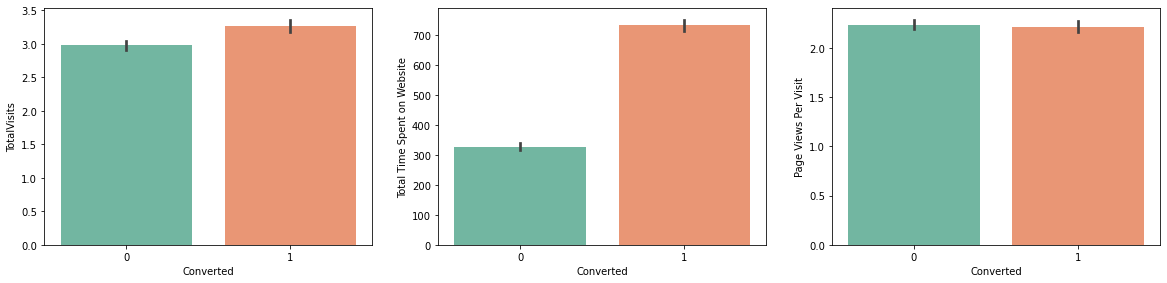

In [486]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', palette='Set2', data = Lead_data)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', palette='Set2', data = Lead_data)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', palette='Set2', data = Lead_data)
plt.show()

### Inference of "numerical variables Vs Converted" catplot:
<span Style="color:blue">
    
- Majority of conversion are seen in all three numerical variables.

</span>

#### Step 6.2d: Categorical variables 

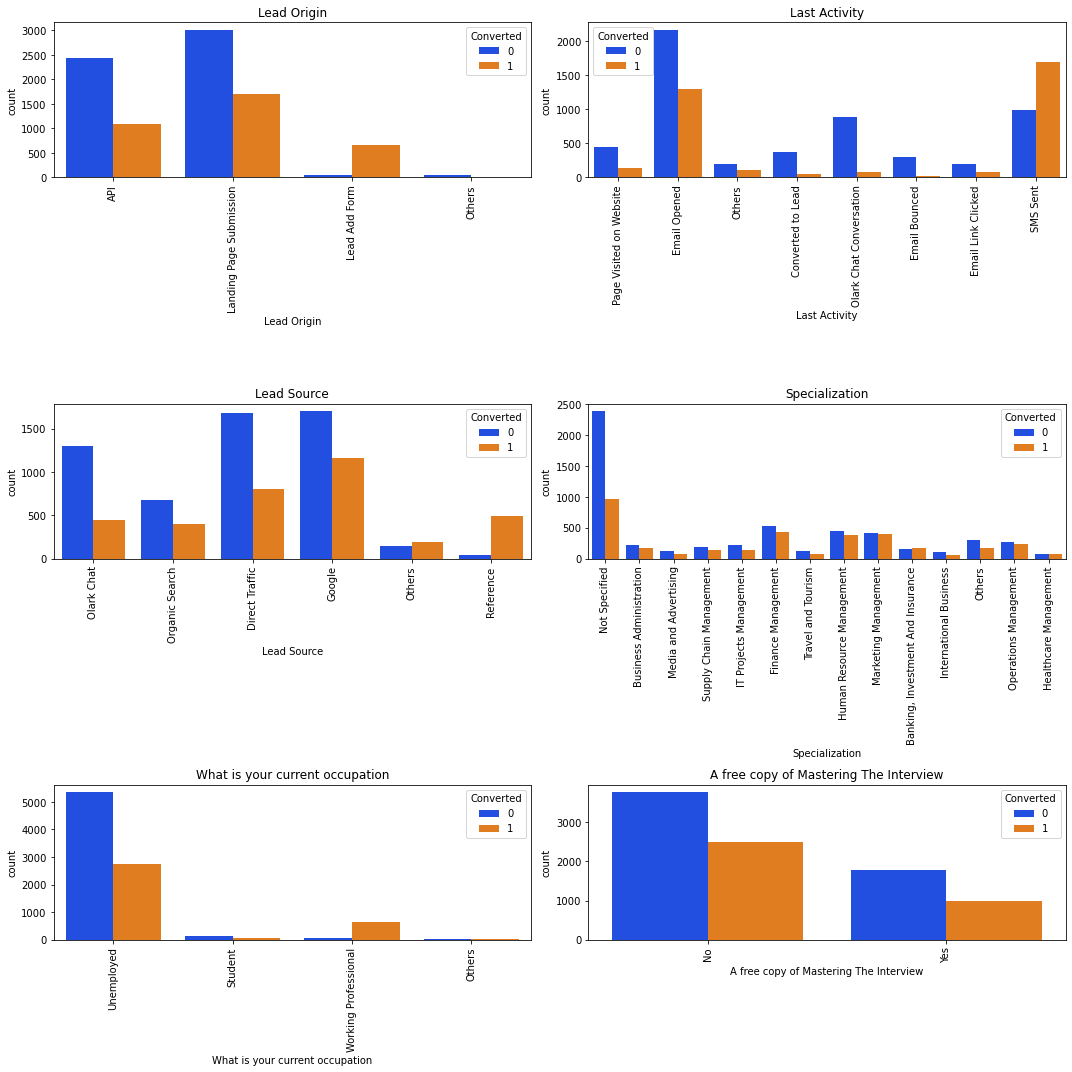

In [487]:
Required_columns= ['Lead Origin','Last Activity', 'Lead Source', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview']
sns.set_palette("bright")

plt.figure(figsize = (15, 15))

for col in enumerate(Required_columns):
    plt.subplot(3, 2, col[0]+1)
    plt.title(col[1])
    ax = sns.countplot(data = Lead_data, x=col[1], hue='Converted') 
    plt.xticks(rotation = 90)
    plt.tight_layout()

### Inference for Univariate analysis for Categorical data
<span Style="color:blue"> 
    
- The percentage of Converted people is found to be greater for Landing Page Submission. We can also see that if Lead source is Add Form, the ratio of lead conversion is very high(almost not converted is very less).

- Google is found to be the important source for Lead Conversion 

- We need to target people via Emails and SMS as it is found that the probability of response in case Converted leads is found to be higher. 

- We cannot infer much about conversion rate from specialisation as people who do not select any specialisation can also be converted to a lead.But the ratio of non converted leads is higher than converted ones if they didn't choose specialisation.

- It is clearly visible from the graph that we need to target the Unemployed and Working Professional to get a higher conversion rate. The ratio of conversion rate is higher than not converted people for working professionals. 

- People usually do not subscribe for a free copy of mastering the interview.
    
</span>

#### Step 6.2n: Heat correlation map for numerical variables in lead score data

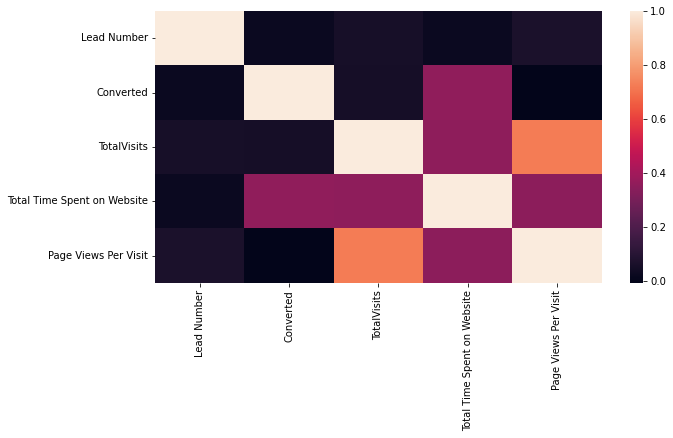

In [488]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(Lead_data.corr())
plt.show()

### Inference of "numerical variables " Heat correlation map:
<span Style="color:blue">
    
- High correlation is shown in Total visits vs Page views per visit.

</span>

## Step 7: Data Preparation - Creating Dummies


#### Step 7.1: Creating a varlist and mapping 1 for yes and 0 for no

In [489]:
varlist =['A free copy of Mastering The Interview']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

Lead_data[varlist] = Lead_data[varlist].apply(binary_map)

In [490]:
Lead_data['A free copy of Mastering The Interview'].describe()

count    9029.000000
mean        0.305682
std         0.460721
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: A free copy of Mastering The Interview, dtype: float64

In [491]:
Lead_data.shape

(9029, 12)

#### step 7.2: Creating dummies for the categorical variables and dropping the first.

In [492]:
dummy_var_list=['Lead Origin', 'Last Activity', 'Lead Source', 'What is your current occupation', 'Specialization']

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead_data[dummy_var_list], drop_first=True)

# Adding the results to the master dataframe
Lead_data = pd.concat([Lead_data, dummy1], axis=1)

Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Step 7.3: To remove the unncessary columns Prospect ID and Lead Number

In [493]:
# Removing Id values since they are unique for everyone
Lead_data = Lead_data.drop(['Prospect ID','Lead Number'],1)
Lead_data.shape

(9029, 41)

#### Step 7.4: Dropping the dummy var list

In [494]:
Lead_data = Lead_data.drop(dummy_var_list,1)
Lead_data.shape

(9029, 36)

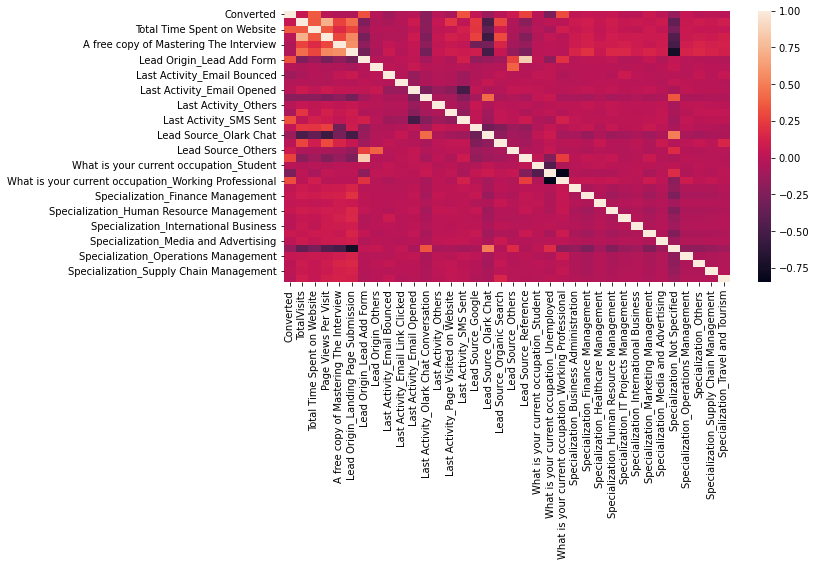

In [495]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
sns.heatmap(Lead_data.corr())
plt.show()

### Inference of Dummy Creation:
<span Style="color:blue">
    
- Dummy columns have been created and the original columns along with few columns with no significance have been dropped.

- Heat correlation map is difficult to visualize due to large columns.

</span>

In [496]:
# Checking the datatypes of all columns
Lead_data.dtypes

Converted                                                 int64
TotalVisits                                             float64
Total Time Spent on Website                               int64
Page Views Per Visit                                    float64
A free copy of Mastering The Interview                    int64
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
Lead Origin_Others                                        uint8
Last Activity_Email Bounced                               uint8
Last Activity_Email Link Clicked                          uint8
Last Activity_Email Opened                                uint8
Last Activity_Olark Chat Conversation                     uint8
Last Activity_Others                                      uint8
Last Activity_Page Visited on Website                     uint8
Last Activity_SMS Sent                                    uint8
Lead Source_Google                      

## Step 8: Test-Train Split


#### Step 8.1: Allotting X variables

In [497]:
X = Lead_data.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Step 8.2: Allotting y variables

In [498]:
y = Lead_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

#### Step 8.3: Splitting the data set into train and test data set

In [499]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Step 8.4: Checking the shape of test and train set

In [500]:
print("X_train =", X_train.shape)
print("X_test =", X_test.shape)
print("y_train =", y_train.shape)
print("y_test =", y_test.shape)

X_train = (6320, 35)
X_test = (2709, 35)
y_train = (6320,)
y_test = (2709,)


## Step 9: Rescaling the features with MinMax Scaling


#### Step 9.1: To apply MinMax scaler for X_train


In [501]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [502]:
# Checking the mean and standard deviation
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism
count,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000,6320.000000
mean,0.194502,0.212107,0.280978,0.306487,0.527690,0.075949,0.006487,0.037184,0.028956,0.381171,0.109335,0.035443,0.065823,0.293987,0.316139,0.193513,0.118354,0.037184,0.055063,0.022468,0.899051,0.075158,0.042563,0.108228,0.018513,0.089399,0.037342,0.020411,0.095728,0.021203,0.371994,0.052057,0.051266,0.036867,0.022627
std,0.176284,0.239873,0.229087,0.461071,0.499272,0.264938,0.080289,0.189226,0.167695,0.485713,0.312084,0.184911,0.247992,0.455622,0.465005,0.395083,0.323053,0.189226,0.228122,0.148213,0.301286,0.263667,0.201886,0.310693,0.134807,0.285341,0.189613,0.141414,0.294241,0.144070,0.483375,0.222160,0.220557,0.188450,0.148722
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.004291,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.187500,0.105634,0.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.250000,0.406690,0.375000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [503]:
### Checking the Conversion Rate percentage

converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
converted

38.50924797873519

### Inference of conversion rate:
<span Style="color:blue">
    
- We have almost 39% conversion rate.

</span>

## Step 10: Feature Selection using RFE


### Model-1

In [504]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6284
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2647.0
Date:                Mon, 17 Oct 2022   Deviance:                       5294.0
Time:                        19:59:44   Pearson chi2:                 7.80e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3885
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5019      0.618     -2.429      0.015      -2.714      -0.290
TotalVisits                                              1.5601      0.290      5.373      0.000       0.991       2.129
Total Time Spent on Website                              4.4824      0.167     26.808      0.000       4.155       4.810
Page Views Per Visit                                    -1.0454      0.249     -4.202      0.000      -1.533      -0.558
A free copy of Mastering The Interview                  -0.1810      0.109     -1.661      0.097      -0.395       0.033
Lead Origin_Landing Page Submission                     -0.9606      0.138     -6.954      0.000      -1.231      -0.690
Lead Origin_Lead Add Form                                4.2741      0.442      9.669      0.000       3.408       5.141
Lead Origin_Others                                      -0.4826      0.514     -0.939      0.348      -1.490       0.524
Last Activity_Email Bounced                             -0.7386      0.363     -2.037      0.042      -1.449      -0.028
Last Activity_Email Link Clicked                         0.6893      0.288      2.390      0.017       0.124       1.255
Last Activity_Email Opened                               1.0199      0.211      4.829      0.000       0.606       1.434
Last Activity_Olark Chat Conversation                   -0.5738      0.261     -2.202      0.028      -1.085      -0.063
Last Activity_Others                                     0.9345      0.269      3.468      0.001       0.406       1.463
Last Activity_Page Visited on Website                    0.2621      0.256      1.026      0.305      -0.239       0.763
Last Activity_SMS Sent                                   2.2096      0.213     10.396      0.000       1.793       2.626
Lead Source_Google                                       0.1707      0.114      1.499      0.134      -0.052       0.394
Lead Source_Olark Chat                                   1.2358      0.165      7.480      0.000       0.912       1.560
Lead Source_Organic Search                               0.1079      0.132      0.820      0.412      -0.150       0.366
Lead Source_Others                                       0.4019      0.284      1.417      0.157      -0.154       0.958
Lead Source_Reference                                   -1.1127      0.492     -2.263      0.024      -2.076      -0.149
What is your current occupation_Student                 -0.1537      0.581     -0.265      0.791      -1.292       0.984
What is your current occupation_Unemployed              -0.6226      0.536     -1.161      0.246      -1.674       0.428
What is your current occupation_Working Professional     1

In [505]:
#Total number of columns
print(len(X_train.columns))

35


#### Step 10.1: Defining Logistic Regression

In [506]:
logreg = LogisticRegression()

#### Step 10.2: Running RFE with 20 variables as output

In [507]:
rfe = RFE(logreg, step = 20)           
rfe = rfe.fit(X_train, y_train)

#### Step 10.3: Checking the columns where RFE is supported

In [508]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 2),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Others', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', True, 1),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', True, 1),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', False, 2),
 ('What is your current occupation_Student', False, 2),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Specialization_Business Ad

In [509]:
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Lead Source_Olark Chat',
       'Lead Source_Others', 'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Not Specified'],
      dtype='object')

In [510]:
#Columns that have been rejected because of RFE.
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Last Activity_Page Visited on Website', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'What is your current occupation_Student',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

## Step 11: Model Building


#### Step 11.1: Model 2

In [511]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.9
Date:                Mon, 17 Oct 2022   Deviance:                       5327.8
Time:                        19:59:44   Pearson chi2:                 8.11e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3853
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7190      0.279     -6.164      0.000      -2.266      -1.172
TotalVisits                                              1.5966      0.279      5.727      0.000       1.050       2.143
Total Time Spent on Website                              4.4890      0.166     26.976      0.000       4.163       4.815
Page Views Per Visit                                    -0.9455      0.243     -3.899      0.000      -1.421      -0.470
Lead Origin_Landing Page Submission                     -1.0745      0.130     -8.285      0.000      -1.329      -0.820
Lead Origin_Lead Add Form                                3.3929      0.219     15.508      0.000       2.964       3.822
Lead Origin_Others                                      -0.7736      0.494     -1.567      0.117      -1.741       0.194
Last Activity_Email Bounced                             -0.8517      0.317     -2.687      0.007      -1.473      -0.230
Last Activity_Email Link Clicked                         0.5542      0.235      2.356      0.018       0.093       1.015
Last Activity_Email Opened                               0.8811      0.130      6.768      0.000       0.626       1.136
Last Activity_Olark Chat Conversation                   -0.7141      0.199     -3.583      0.000      -1.105      -0.323
Last Activity_Others                                     0.7970      0.212      3.753      0.000       0.381       1.213
Last Activity_SMS Sent                                   2.0683      0.134     15.425      0.000       1.806       2.331
Lead Source_Olark Chat                                   1.1464      0.140      8.193      0.000       0.872       1.421
Lead Source_Others                                       0.5968      0.225      2.653      0.008       0.156       1.038
What is your current occupation_Unemployed              -0.4736      0.211     -2.241      0.025      -0.888      -0.059
What is your current occupation_Working Professional     2.0605      0.276      7.460      0.000       1.519       2.602
Specialization_Not Specified                            -1.1312      0.125     -9.068      0.000      -1.376      -0.887
========================================================================================================================
"""

In [512]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,What is your current occupation_Unemployed,14.87
2,Page Views Per Visit,6.87
3,Lead Origin_Landing Page Submission,6.04
0,TotalVisits,4.87
8,Last Activity_Email Opened,4.10
16,Specialization_Not Specified,4.03
11,Last Activity_SMS Sent,3.53
12,Lead Source_Olark Chat,2.89
9,Last Activity_Olark Chat Conversation,2.26
1,Total Time Spent on Website,2.24


<span Style="color:blue">
    
- Removing column "What is your current occupation_Unemployed" as it has a high VIF value and hence it is insignificant.

</span>

In [513]:
#Removing column "What is your current occupation_Unemployed" as it has a high p value and hence it is insignificant
col = col.drop('What is your current occupation_Unemployed',1)

In [514]:
len(col)

16

#### Step 11.2: Model 3

In [515]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2666.4
Date:                Mon, 17 Oct 2022   Deviance:                       5332.8
Time:                        19:59:45   Pearson chi2:                 8.12e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3848
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1744      0.191    -11.361      0.000      -2.549      -1.799
TotalVisits                                              1.6066      0.279      5.766      0.000       1.060       2.153
Total Time Spent on Website                              4.4971      0.166     27.028      0.000       4.171       4.823
Page Views Per Visit                                    -0.9637      0.242     -3.978      0.000      -1.438      -0.489
Lead Origin_Landing Page Submission                     -1.0728      0.130     -8.270      0.000      -1.327      -0.819
Lead Origin_Lead Add Form                                3.4011      0.219     15.559      0.000       2.973       3.830
Lead Origin_Others                                      -0.7755      0.494     -1.571      0.116      -1.743       0.192
Last Activity_Email Bounced                             -0.8530      0.317     -2.688      0.007      -1.475      -0.231
Last Activity_Email Link Clicked                         0.5452      0.235      2.319      0.020       0.084       1.006
Last Activity_Email Opened                               0.8816      0.130      6.775      0.000       0.627       1.137
Last Activity_Olark Chat Conversation                   -0.7071      0.199     -3.554      0.000      -1.097      -0.317
Last Activity_Others                                     0.7857      0.212      3.699      0.000       0.369       1.202
Last Activity_SMS Sent                                   2.0573      0.134     15.367      0.000       1.795       2.320
Lead Source_Olark Chat                                   1.1512      0.140      8.231      0.000       0.877       1.425
Lead Source_Others                                       0.5877      0.225      2.610      0.009       0.146       1.029
What is your current occupation_Working Professional     2.5199      0.185     13.589      0.000       2.156       2.883
Specialization_Not Specified                            -1.1359      0.125     -9.098      0.000      -1.381      -0.891
========================================================================================================================
"""

In [516]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.66
0,TotalVisits,4.77
3,Lead Origin_Landing Page Submission,4.34
8,Last Activity_Email Opened,3.54
11,Last Activity_SMS Sent,3.08
15,Specialization_Not Specified,3.00
12,Lead Source_Olark Chat,2.61
1,Total Time Spent on Website,2.19
9,Last Activity_Olark Chat Conversation,2.11
4,Lead Origin_Lead Add Form,1.59


<span Style="color:blue">
    
- Removing column "Page Views Per Visit" as it has a high VIF value and hence it is insignificant.

</span>

In [517]:
col = col.drop('Page Views Per Visit', 1)

In [518]:
len(col)

15

#### Step 11.3: Model 4

In [519]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2674.4
Date:                Mon, 17 Oct 2022   Deviance:                       5348.8
Time:                        19:59:45   Pearson chi2:                 8.28e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3832
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3123      0.188    -12.273      0.000      -2.682      -1.943
TotalVisits                                              1.0431      0.241      4.326      0.000       0.570       1.516
Total Time Spent on Website                              4.4880      0.166     27.000      0.000       4.162       4.814
Lead Origin_Landing Page Submission                     -1.1114      0.129     -8.603      0.000      -1.365      -0.858
Lead Origin_Lead Add Form                                3.5712      0.215     16.623      0.000       3.150       3.992
Lead Origin_Others                                      -0.6554      0.493     -1.329      0.184      -1.622       0.311
Last Activity_Email Bounced                             -0.8719      0.318     -2.741      0.006      -1.495      -0.248
Last Activity_Email Link Clicked                         0.5010      0.235      2.134      0.033       0.041       0.961
Last Activity_Email Opened                               0.8252      0.129      6.397      0.000       0.572       1.078
Last Activity_Olark Chat Conversation                   -0.7460      0.198     -3.760      0.000      -1.135      -0.357
Last Activity_Others                                     0.7276      0.212      3.438      0.001       0.313       1.142
Last Activity_SMS Sent                                   1.9804      0.132     15.013      0.000       1.722       2.239
Lead Source_Olark Chat                                   1.3186      0.134      9.855      0.000       1.056       1.581
Lead Source_Others                                       0.5658      0.224      2.522      0.012       0.126       1.006
What is your current occupation_Working Professional     2.5200      0.185     13.594      0.000       2.157       2.883
Specialization_Not Specified                            -1.1106      0.125     -8.921      0.000      -1.355      -0.867
========================================================================================================================
"""

In [520]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.97
7,Last Activity_Email Opened,3.35
0,TotalVisits,3.08
14,Specialization_Not Specified,2.96
10,Last Activity_SMS Sent,2.91
11,Lead Source_Olark Chat,2.45
1,Total Time Spent on Website,2.18
8,Last Activity_Olark Chat Conversation,2.07
3,Lead Origin_Lead Add Form,1.55
12,Lead Source_Others,1.44


<span Style="color:blue">
    
- Removing column "Lead Origin_Others" as it has a high p value but low VIF value and hence it is insignificant.

</span>

In [521]:
col = col.drop('Lead Origin_Others', 1)

In [522]:
len(col)

14

#### Step 11.4: Model 5

In [523]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2675.3
Date:                Mon, 17 Oct 2022   Deviance:                       5350.6
Time:                        19:59:46   Pearson chi2:                 8.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3830
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3368      0.188    -12.455      0.000      -2.705      -1.969
TotalVisits                                              1.0708      0.240      4.457      0.000       0.600       1.542
Total Time Spent on Website                              4.4986      0.166     27.074      0.000       4.173       4.824
Lead Origin_Landing Page Submission                     -1.0903      0.128     -8.510      0.000      -1.341      -0.839
Lead Origin_Lead Add Form                                3.6323      0.211     17.214      0.000       3.219       4.046
Last Activity_Email Bounced                             -0.8804      0.318     -2.764      0.006      -1.505      -0.256
Last Activity_Email Link Clicked                         0.4968      0.235      2.115      0.034       0.036       0.957
Last Activity_Email Opened                               0.8172      0.129      6.340      0.000       0.565       1.070
Last Activity_Olark Chat Conversation                   -0.7460      0.198     -3.760      0.000      -1.135      -0.357
Last Activity_Others                                     0.7252      0.212      3.424      0.001       0.310       1.140
Last Activity_SMS Sent                                   1.9733      0.132     14.969      0.000       1.715       2.232
Lead Source_Olark Chat                                   1.3358      0.133     10.023      0.000       1.075       1.597
Lead Source_Others                                       0.4272      0.200      2.135      0.033       0.035       0.819
What is your current occupation_Working Professional     2.5195      0.185     13.596      0.000       2.156       2.883
Specialization_Not Specified                            -1.0958      0.124     -8.846      0.000      -1.339      -0.853
========================================================================================================================
"""

In [524]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.95
6,Last Activity_Email Opened,3.29
0,TotalVisits,3.07
13,Specialization_Not Specified,2.96
9,Last Activity_SMS Sent,2.88
10,Lead Source_Olark Chat,2.44
1,Total Time Spent on Website,2.18
7,Last Activity_Olark Chat Conversation,2.06
3,Lead Origin_Lead Add Form,1.49
4,Last Activity_Email Bounced,1.23


<span Style="color:blue">
    
- Both p value and VIF values are less than 0.05 and 5 respectively. So this model will be accepted for evaluation.
    
- Model 5 will be our final model

</span>

## Step 12: y train prediction


In [525]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.092283
8064    0.072497
4716    0.308403
9117    0.217601
2402    0.379004
1796    0.055053
1120    0.055053
253     0.113328
1491    0.243111
2004    0.250809
dtype: float64

In [526]:
#Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
5493,0,0.092283
8064,0,0.072497
4716,0,0.308403
9117,0,0.217601
2402,1,0.379004


In [527]:
# predicted converted by selected Randam cutoff
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
5493,0,0.092283,0
8064,0,0.072497,0
4716,0,0.308403,0
9117,0,0.217601,0
2402,1,0.379004,0


## Step 13: Finding Optimal Cutoff Point


In [528]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5493,0,0.092283,0,1,0,0,0,0,0,0,0,0,0
8064,0,0.072497,0,1,0,0,0,0,0,0,0,0,0
4716,0,0.308403,0,1,1,1,1,0,0,0,0,0,0
9117,0,0.217601,0,1,1,1,0,0,0,0,0,0,0
2402,1,0.379004,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,0.022525,0,1,0,0,0,0,0,0,0,0,0
82,1,0.882386,1,1,1,1,1,1,1,1,1,1,0
8226,1,0.774053,1,1,1,1,1,1,1,1,1,0,0
7089,1,0.967724,1,1,1,1,1,1,1,1,1,1,1


In [529]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [530]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.381487,1.000000,0.000000
0.1,0.1,0.594778,0.968478,0.364288
0.2,0.2,0.725949,0.928246,0.601177
0.3,0.3,0.793038,0.836997,0.765925
0.4,0.4,0.812658,0.771464,0.838066
0.5,0.5,0.807278,0.666114,0.894346
0.6,0.6,0.796994,0.590212,0.924533
0.7,0.7,0.780696,0.514724,0.944743
0.8,0.8,0.754589,0.407300,0.968790
0.9,0.9,0.702215,0.236831,0.989256


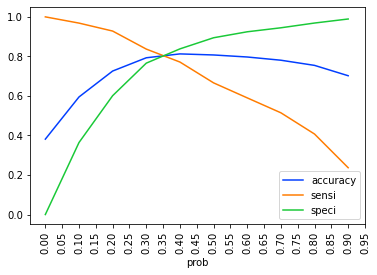

<Figure size 792x792 with 0 Axes>

In [531]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.tight_layout()
plt.show()

<span Style="color:blue">
    
- From the above curve, we can see the optimum point for cutoff probability is 0.35.

</span>

In [532]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
5493,0,0.092283,0,1,0,0,0,0,0,0,0,0,0,0
8064,0,0.072497,0,1,0,0,0,0,0,0,0,0,0,0
4716,0,0.308403,0,1,1,1,1,0,0,0,0,0,0,0
9117,0,0.217601,0,1,1,1,0,0,0,0,0,0,0,0
2402,1,0.379004,0,1,1,1,1,0,0,0,0,0,0,1


## Step 14: Confusion Metrics and Accuracy

In [533]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3162,  747],
       [ 474, 1937]], dtype=int64)

In [534]:
#Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8068037974683544

In [535]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [536]:
# Calculating the sensitivity
TP/(TP+FN)

0.8034010783907093

In [537]:
# Calculating the specificity
TN/(TN+FP)

0.8089025326170376

In [538]:
#Calculate false postive rate - predicting conversion rate when customer will be a hot lead or not
FP/(TN+FP)

0.1910974673829624

In [539]:
#Positive predictive value 
print (TP / float(TP+FP))

0.7216840536512668


In [540]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8696369636963697


### Interpretation of Accuracy - Specificity - Sensitivity
<span Style="color:blue">
    
- Accuracy    = 80.68%
- Sensitivity = 80.34%
- Specificity = 80.89%

</span>

## Step 15: Plotting the ROC curve

In [541]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [542]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

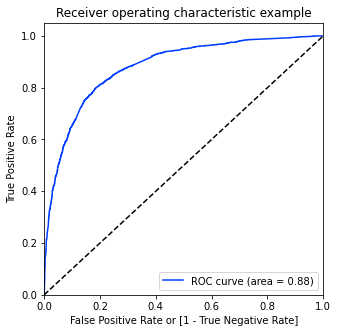

In [543]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## Step 16: Making Predictions on the Test set


#### Step 16.1: Scaling on test set

In [544]:
#Perform all the scaling on the available features.
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [545]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Others,What is your current occupation_Working Professional,Specialization_Not Specified
4664,0.0000,0.000000,0,0,0,0,1,0,0,0,1,0,0,1
5394,0.2500,0.072183,0,0,0,0,1,0,0,0,1,0,0,0
1595,0.2500,0.515405,1,0,0,0,1,0,0,0,0,0,1,0
2111,0.4375,0.229754,1,0,0,0,1,0,0,0,0,0,0,0
9182,0.0000,0.000000,0,0,0,0,0,0,0,1,1,0,0,1


In [546]:
#Adding a constant for X_Test.
X_test_sm = sm.add_constant(X_test)

In [547]:
#y_test_pred - X_test_sm has all the features after model building
#res = > Result of model building

y_test_pred = res.predict(X_test_sm)

In [548]:
X_test_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'What is your current occupation_Working Professional',
       'Specialization_Not Specified'],
      dtype='object')

In [549]:
#Displaying all the predicted values
y_test_pred[:10]

4664    0.217601
5394    0.600732
1595    0.923844
2111    0.248248
9182    0.469149
1055    0.729528
541     0.116925
446     0.996946
3728    0.038491
4249    0.051507
dtype: float64

#### Step 16.2: Creating a dataframe with the predicted values

In [550]:
#Converting y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4664,0.217601
5394,0.600732
1595,0.923844
2111,0.248248
9182,0.469149


In [551]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [552]:
# Removing index for both dataframes to append them side by side 

y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [553]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [554]:
y_pred_final.head()

,Converted,0
0,0,0.217601
1,0,0.600732
2,1,0.923844
3,0,0.248248
4,0,0.469149


In [555]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [556]:
#Predicting the test model on cut off probabilty
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [557]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Converted','Converted_Prob'], axis=1)

In [558]:
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.217601
1,0,0.600732
2,1,0.923844
3,0,0.248248
4,0,0.469149


In [559]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37%

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [560]:
y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.217601,0
1,0,0.600732,1
2,1,0.923844,1
3,0,0.248248,0
4,0,0.469149,1


In [561]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,Converted_Prob,final_predicted,lead_score
0,0,0.217601,0,22
1,0,0.600732,1,60
2,1,0.923844,1,92
3,0,0.248248,0,25
4,0,0.469149,1,47
5,1,0.729528,1,73
6,0,0.116925,0,12
7,1,0.996946,1,100
8,0,0.038491,0,4
9,0,0.051507,0,5


In [562]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    869
0    197
Name: final_predicted, dtype: int64

In [563]:
# check the precentage of final_predicted conversions on test data

869/float(869+197)

0.8151969981238274

## Step 17: Metrics on Test set


In [564]:
confusion2= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusion2

array([[1347,  296],
       [ 197,  869]], dtype=int64)

In [565]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [566]:
# Calculating the specificity
TN/(TN+FP)

0.819841752891053

In [567]:
# Calculating the sensitivity
TP/(TP+FN)

0.8151969981238274

In [568]:
# Let's check the accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8180140273163529

### Interpretation of Accuracy - Specificity - Sensitivity on Test Set
<span Style="color:blue">
    
- Accuracy    = 81.80%
- Sensitivity = 81.52%
- Specificity = 81.98%

</span>

## OBSERVATION : 

**We got 0.5% to 1% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.**

**From our model, We can conclude following points :**
    
**1. The customer/leads who fills the form are the potential leads.**

**2. We must majorly focus on working professionals.**

**3. We must majorly focus on leads whose last activity is SMS sent or Email opened.** 

**4. It’s always good to focus on customers, who have spent significant time on our website.**

**5. It’s better to focus least on customers to whom the sent mail is bounced back.**

**6. If the lead source is referral, he/she may not be the potential lead.**

**7. If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target. So, it’s better to focus less on such cases.**

## Step 18: LEAD SCORE - ASSIGNMENT TO ALL CUSTOMERS

In [569]:
#Preparing the dataframe - to scale the variables and prepare the complete data.
X[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

In [570]:
#Selecting the features in our final model on the scaled dataframe.
X = X[col]
X.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Others,What is your current occupation_Working Professional,Specialization_Not Specified
0,0.0000,0.000000,0,0,0,0,0,0,0,0,1,0,0,1
1,0.3125,0.296655,0,0,0,0,1,0,0,0,0,0,0,1
2,0.1250,0.674296,1,0,0,0,1,0,0,0,0,0,0,0
3,0.0625,0.134243,1,0,0,0,0,0,1,0,0,0,0,0
4,0.1250,0.628521,1,0,0,0,0,0,0,0,0,0,0,1


In [571]:
#Adding a constant to the dataframe
X_sm = sm.add_constant(X)

In [572]:
#Predicting the y-values on X dataframe (Leads.csv)
y_ans_pred = res.predict(X_sm)

In [573]:
#Printing the probabilities
y_ans_pred[:10]

0    0.109402
1    0.279622
2    0.635807
3    0.115968
4    0.173407
5    0.055053
6    0.683749
7    0.055053
8    0.088219
9    0.242845
dtype: float64

In [574]:
#Converting y_pred to a dataframe which is an array
y_ans_pred_df = pd.DataFrame(y_ans_pred)

In [575]:
#Converting y to dataframe
y_df = pd.DataFrame(y)

In [576]:
#Removing index for both dataframes to append them side by side 
y_ans_pred_df.reset_index(drop=True, inplace=True)
y_df.reset_index(drop=True, inplace=True)

In [577]:
#Appending y_test_df and y_df
y_ans_final = pd.concat([y_df, y_ans_pred_df],axis=1)

In [578]:
#Renaming the column 
y_ans_final= y_ans_final.rename(columns={ 0 : 'Conversion_Prob'})

In [579]:
#Displaying the Answer_Dataframe
y_ans_final.head()

,Converted,Conversion_Prob
0,0,0.109402
1,0,0.279622
2,1,0.635807
3,0,0.115968
4,1,0.173407


In [580]:
#Finding the Predicted values using the probability cut off
y_ans_final['final_predicted'] = y_ans_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [581]:
#Appending the score to the dataframe.
y_ans_final['Score'] = round(y_ans_final['Conversion_Prob'] * 100, 2)

In [582]:
#Displaying the predicted conversion on the final values
y_ans_final.head()

,Converted,Conversion_Prob,final_predicted,Score
0,0,0.109402,0,10.94
1,0,0.279622,0,27.96
2,1,0.635807,1,63.58
3,0,0.115968,0,11.60
4,1,0.173407,0,17.34


### Step 18.2: Metric Calculation - Complete Dataframe

In [583]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_ans_final.Converted, y_ans_final.final_predicted)

0.8085059253516447

In [584]:
#Confusion Matrix
confusionAns= metrics.confusion_matrix(y_ans_final.Converted, y_ans_final.final_predicted)
confusionAns

array([[4481, 1071],
       [ 658, 2819]], dtype=int64)

In [585]:
#Confusion Matrix - Parameters
TP = confusionAns[1,1] # true positive 
TN = confusionAns[0,0] # true negatives
FP = confusionAns[0,1] # false positives
FN = confusionAns[1,0] # false negatives

In [586]:
# Let's see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)


81.0


In [587]:
# Let us calculate specificity
(TN / float(TN+FP))*100

80.70965417867436

## Step 19: Conclusion

### Step 19.1: conclusions

<span Style="color:blue">

**From our model, we can conclude following points :**

- The customer/leads who fills the form are the potential leads.
- We must majorly focus on working professionals.
- We must majorly focus on leads whose last activity is SMS sent or Email opened.
- It’s always good to focus on customers, who have spent significant time on our website.
- It’s better to focus least on customers to whom the sent mail is bounced back.
- If the lead source is referral, he/she may not be the potential lead.
- If the lead didn’t fill specialization, he/she may not know what to study and are not right people to target. So, it’s better to focus less on such cases.


**We know that the relationship between ln(odds) of ‘y’ and feature variable “X” is much more intuitive and easier to understand.** 

**Equation:**

**ln(odds)= -2.3368 * const + 1.0708 * TotalVisits + 4.4986* Time Spent on Website -1.0903 * Lead Origin_Landing Page Submission + 3.6323 * Lead Origin_Lead Add Form - 0.8804 * Last Activity_Email Bounced + 0.4968 * Lead Source_Reference -1.1921 *
Last Activity_Email Bounced + 0.8166 * Last Activity_Email Link Clicked + 0.8172 * Last Activity_Email Opened - 0.7460 * Last
Activity_Olark Chat Conversation + 0.7252 * Last Activity_Others + 1.9733 * Last
Activity_SMS Sent + 1.3358 * Lead Source_Olark Chat + 0.4272 * Lead Source_Others + 2.5195 * What is your current occupation_Working Professional - 1.0958 * Specialization_Not Specified** 
</span>

### Step 19.2: Recommendations

<span Style="color:blue">
- **It’s good to collect data often and run the model and get updated with the potential leads. There is a belief that the best time to call your potential leads is within few hours after the lead shows interest in the courses.**

- **Along with phone calls, it’s good to mail the leads also to keep them reminding as email is as powerful as cold calling.**

- **Reducing the number of call attempts to 2-4 and increasing the frequency of usage of other media like advertisements in Google, or via emails to keep in touch with the lead will save a lot of time.**

- **Focusing on Hot Leads will increase the chances of obtaining more value to the business as the number of people we contact are less but the conversion rate is high.**
</span>

---------------Thank you--------------
